# Importing necessary libraries and Dataset as well

In [139]:
import pandas as pd
import numpy as np
df = pd.read_csv("happiness_score_dataset.csv")

In [140]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

# Viewing the Dataset

In [141]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Describing the dataset

In [142]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Checking for any Null Values

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Our target variable is the Hapiness score as previously stated so we will keep it. Country name is not important here because each country only appears once and will not provide any additional value, as well as it is not a quantitative variable. I am also dropping the Standard error column.

# Dropping Unecessary columns

In [144]:
df = df.drop(columns=['Country','Standard Error','Dystopia Residual','Region','Happiness Rank'])

# Describing the data again:

In [146]:
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# Checking the Null values


In [147]:
df.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

No null values present so everythig looks fine

## Spliting the features and label

In [148]:
y= df['Happiness Score']
x= df.drop(['Happiness Score'], axis =1)

## Plotting Scatterplot to see the distribution

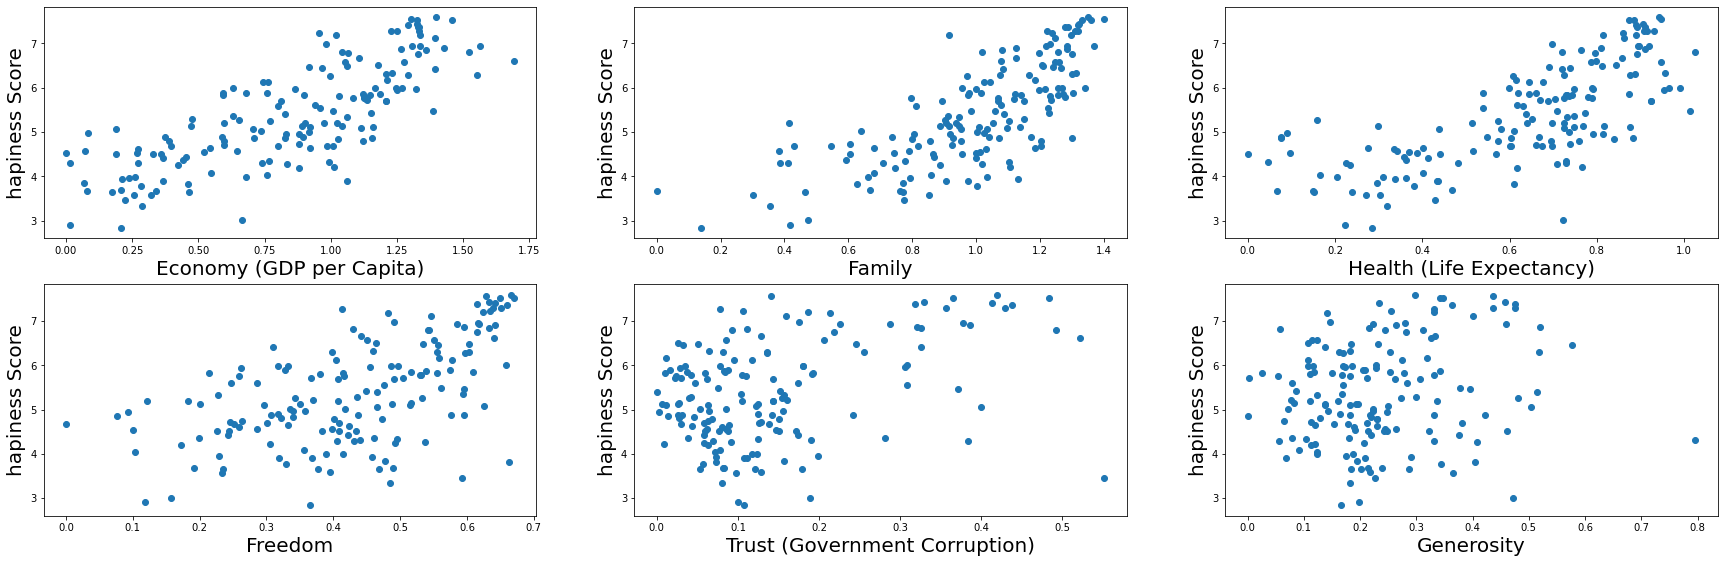

In [149]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in x:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('hapiness Score',fontsize=20)
    plotnumber +=1
plt.show()

In [150]:
df.shape

(158, 7)

Lets check the correlation between fields

In [151]:
data_corr = df.corr()
data_corr

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


## Checking the Heatmap for correlation

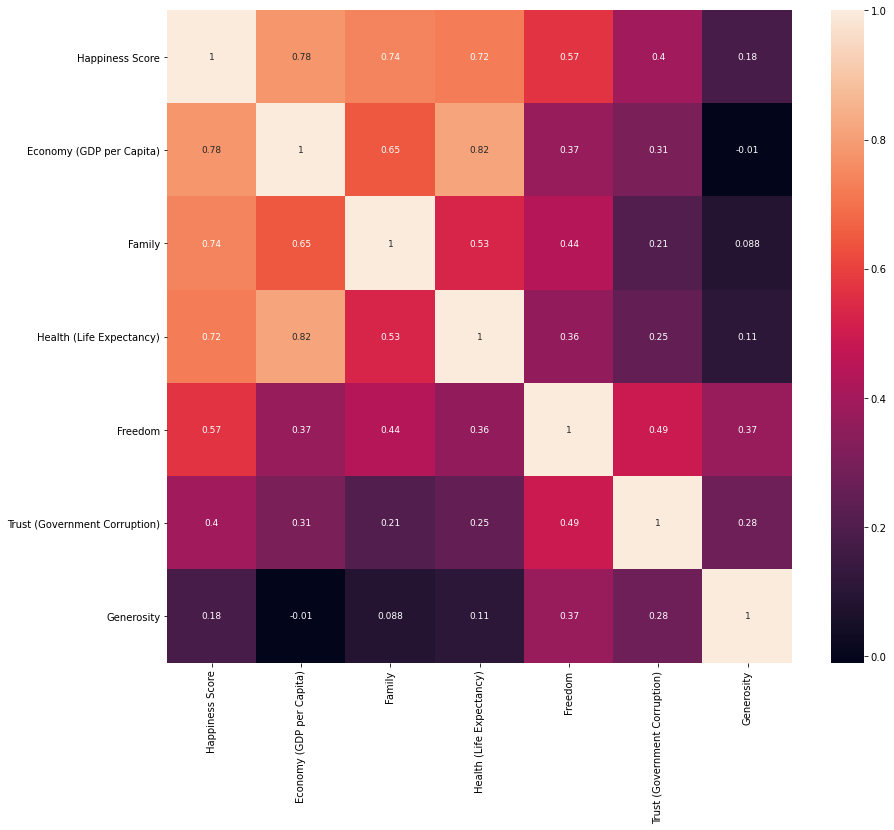

In [152]:
plt.figure(figsize=(14,12))
sns.heatmap(data_corr,annot=True, annot_kws={"size": 9})
plt.show()

## Describing data again

In [153]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


## Ploting Distribution plot to check the distribution

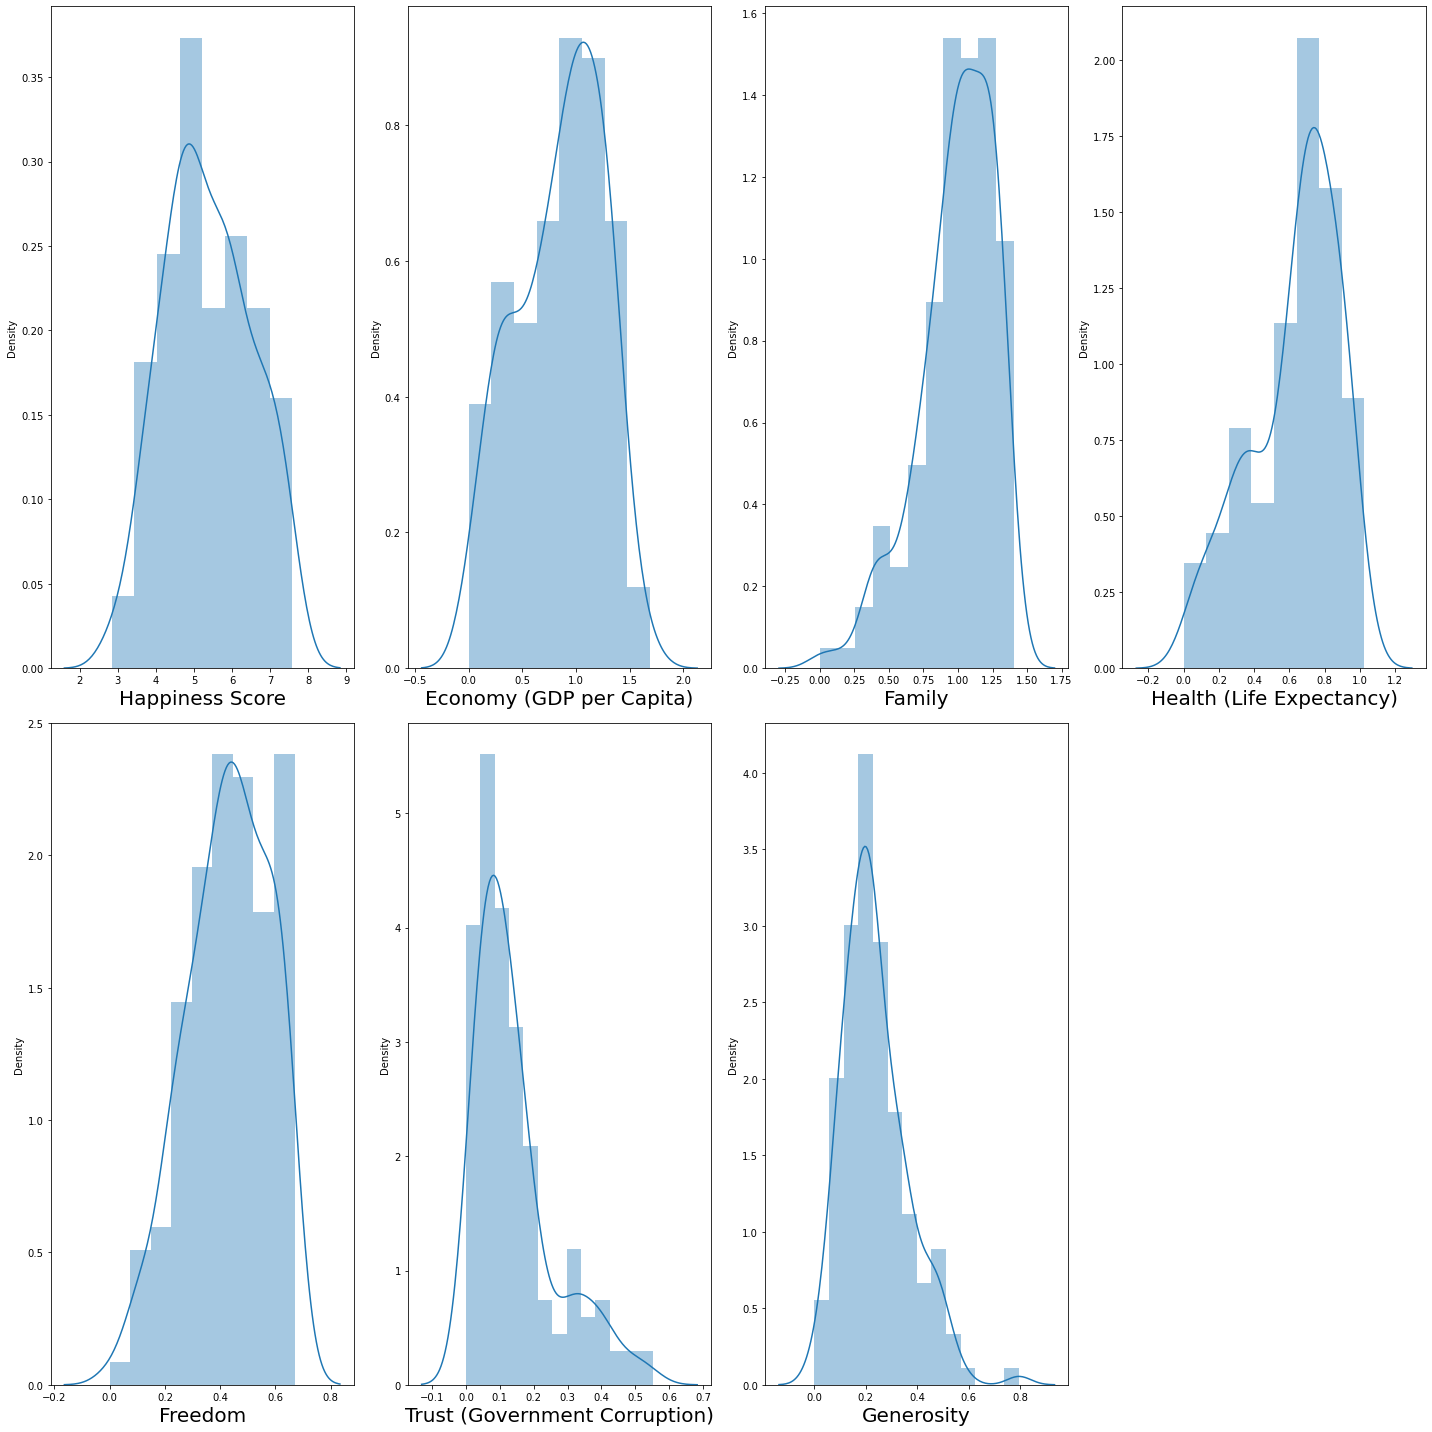

In [154]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber= 1
for column in df:
    if plotnumber<=7:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [155]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


## Scaling the Data 

In [156]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Happiness Score', axis=1)
y_train = train['Happiness Score']

x_test = test.drop('Happiness Score', axis = 1)
y_test = test['Happiness Score']

In [157]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [189]:
x_train.head()

,0,1,2,3,4,5
0,-1.574503,0.124014,-1.858115,-0.301589,-0.234553,-0.418511
1,-2.192984,-2.230755,-1.775605,-0.010634,-0.657278,0.700279
2,0.182215,0.888733,0.870411,1.398177,-0.373679,0.104502
3,-0.740628,-0.997777,-0.426977,1.135784,0.701104,1.407935
4,0.677506,0.851105,0.509103,0.116507,-0.011826,-1.208457


## Building Model- KNN

In [182]:
#import required packages
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

## Let us have a look at the error rate for different k values

In [160]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8185573819226114
RMSE value for k=  2 is: 0.7804187978258852
RMSE value for k=  3 is: 0.7271410403715312
RMSE value for k=  4 is: 0.702712071340982
RMSE value for k=  5 is: 0.6942602844034794
RMSE value for k=  6 is: 0.6806303740052442
RMSE value for k=  7 is: 0.6767810192700574
RMSE value for k=  8 is: 0.670120527580207
RMSE value for k=  9 is: 0.669484195454204
RMSE value for k=  10 is: 0.6552053541002749
RMSE value for k=  11 is: 0.6509961441385007
RMSE value for k=  12 is: 0.6511392857924599
RMSE value for k=  13 is: 0.6614387012027025
RMSE value for k=  14 is: 0.6544376757566988
RMSE value for k=  15 is: 0.6496764079852313
RMSE value for k=  16 is: 0.6639149676802713
RMSE value for k=  17 is: 0.6660980226935198
RMSE value for k=  18 is: 0.6734140672094977
RMSE value for k=  19 is: 0.6716037867749362
RMSE value for k=  20 is: 0.6699225123101925


<AxesSubplot:>

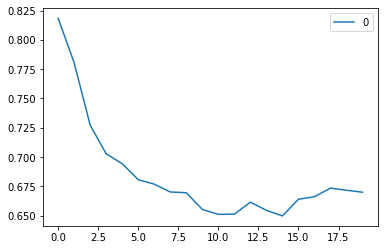

In [199]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

The RMSE value decreases as we increase the k value. At k= 15, the RMSE is approximately 0.6496, and shoots up on further increasing the k value. We can safely say that k=15 will give us the best result in this case.

## Implementing GridsearchCV 

In [211]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=3)
model.fit(x_train,y_train)
model.best_params_



{'n_neighbors': 10}

In [212]:
model.score(x_train,y_train)

0.7842778695677401

In [213]:
 pred_test=model.predict(x_test)

In [214]:
pred_test

array([6.1009, 4.0945, 6.4546, 4.3089, 6.1673, 7.0816, 4.3164, 5.2617,
       5.5181, 5.0077, 5.1246, 5.5136, 3.7935, 6.0933, 4.2266, 5.291 ,
       7.022 , 6.6378, 5.5145, 5.5803, 5.7448, 5.0001, 6.0952, 6.7986,
       7.2585, 7.1759, 4.9498, 6.8674, 4.2467, 4.2267, 5.9368, 6.1493])

In [217]:
model.score(x_test,y_test)

0.7580830710989112

## Saving the model

In [222]:
import pickle
filename = 'Happiness_dataset.pkl'
pickle.dump(knn,open(filename, 'wb'))

# Conclusion

In [223]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com

,Original,Predicted
0,5.102,5.6998
1,4.512,4.0342
2,5.987,6.0370
3,3.931,4.1030
4,6.485,6.0002
5,6.798,6.6386
6,3.465,4.0390
7,3.896,4.9094
8,5.098,5.1730
9,4.677,4.9862
